# Redes neurais para avaliação do consumo do carro_res

In [26]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [9]:
df=pd.read_csv('c:\\dados\\cars-uci-linked.csv',sep=';')
y=df['name']
df=df.dropna()
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null int64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null int64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 30.6+ KB


In [10]:
df=df.drop(labels=['name'],axis=1)
y=df['mpg']
df=df.drop(labels=['mpg'],axis=1)

In [11]:
scaler = StandardScaler()
scaler.fit(df)
X=scaler.transform(df)


Estime o erro médio quadrático na amostra de treinamento toda com 10 perceptrons random_state=42

In [18]:
ann_car=MLPRegressor(hidden_layer_sizes=(10,),random_state=42,max_iter=5000)

In [19]:
ann_car.fit(X,y)
ye=ann_car.predict(X)
print(mean_squared_error(ye,y))

6.468380317610933


 Obtenha o número de perceptrons (2,10,50,100,200 ou 500) na hidden layer que minimize o erro em split 30%. Faça gráfico.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


In [29]:
erro_min,n=1000,-1
hidden=[2,10,50,100,200,500]
erro_h=[]
for h in hidden:
    ann_car=MLPRegressor(hidden_layer_sizes=(h,),random_state=42,max_iter=5000)
    ann_car.fit(X_train,y_train)
    ye_test=ann_car.predict(X_test)
    er=mean_squared_error(ye_test,y_test)
    erro_h.append(er)
    if er<erro_min:
        erro_min,n=er,h
        
    
    
erro_min,n   

(6.905605373489642, 200)

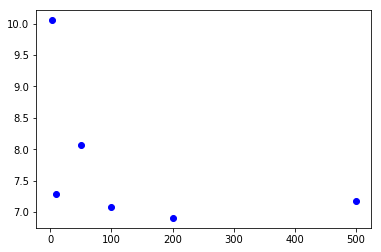

In [30]:
plt.plot(hidden,erro_h,'bo')
plt.show()

Agora é com você. Tente um erro nos testes menor que o atual.....mexer nas features? Avaliar relevância delas?